In [1]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit, qtm.fubini_study
import importlib
importlib.reload(qtm.fubini_study)
importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\HAI\\Desktop\\vutuanhai\\QuantumTomography\\codes\\qtm\\nqubit.py'>

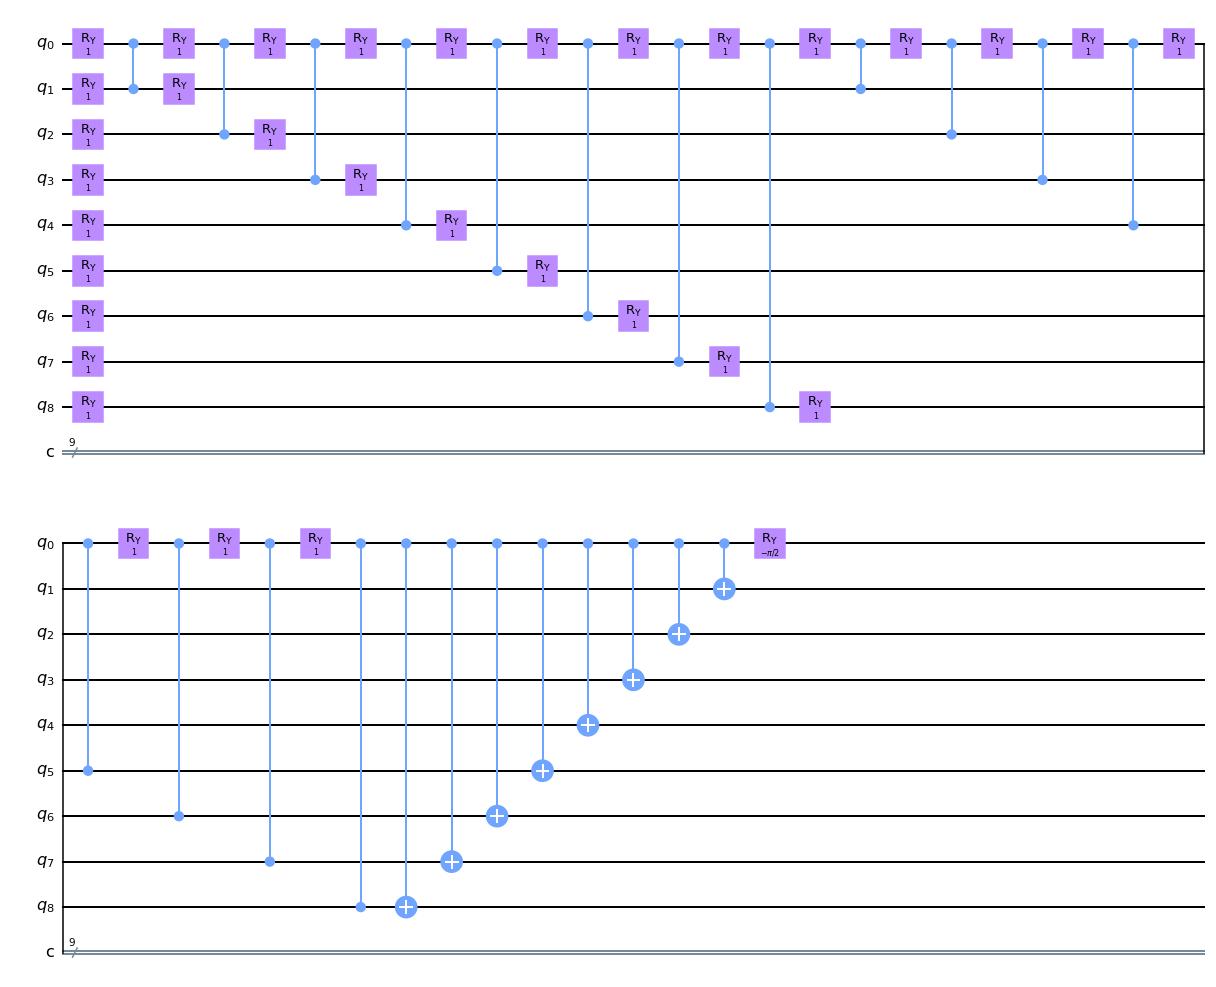

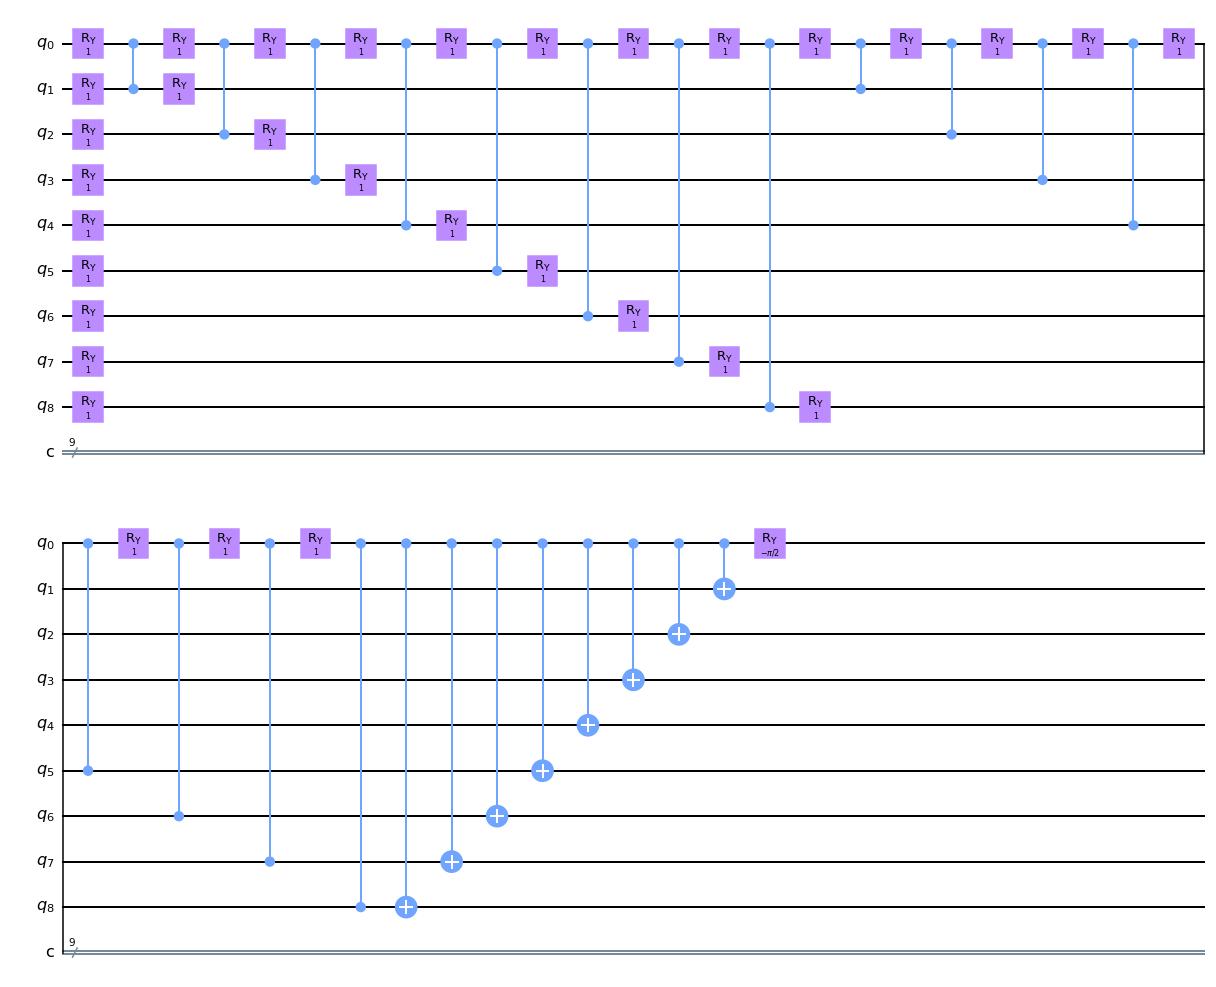

In [2]:
num_qubits = 9
num_layers = 2
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_GHZchecker_star2graph(qc, thetas, num_layers, theta)  
qc.draw('mpl') 

In [8]:
# Init parameters
num_qubits = 9
num_layers = 2
# thetas = np.random.uniform(low = 0, high = 1, size = num_layers*(2*num_qubits - 2)) 
thetas = np.zeros(num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 100):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_star2graph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_GHZchecker_star2graph(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80


In [9]:
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/thetass_qng.csv", thetass, delimiter=",")

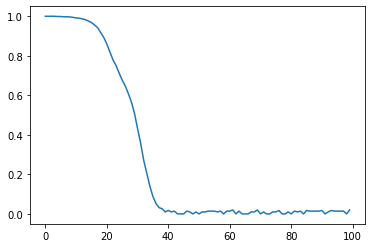

In [ ]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

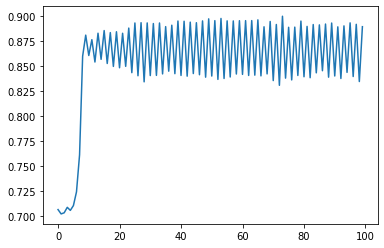

In [12]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [11]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/traces_qng.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/fidelities_qng.csv", fidelities, delimiter=",")

### W preparation

In [23]:
# Init parameters
num_qubits = 9
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 100):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchecker_star2graph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_Wchecker_star2graph(qc.copy(), thetas, num_layers)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80


In [24]:
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/thetass_qng.csv", thetass, delimiter=",")

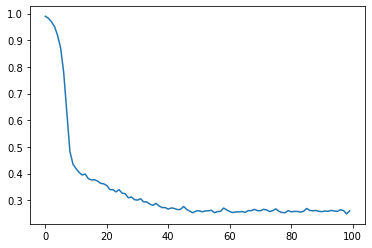

In [25]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [26]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/traces_qng.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/fidelities_qng.csv", fidelities, delimiter=",")

In [41]:
# Init parameters
num_qubits = 7
num_layers = 3
# thetas = np.random.uniform(low = 0, high = 1, size = num_layers*(2*num_qubits - 2)) 
thetas = np.ones(num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 200):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_star2graph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_GHZchecker_star2graph(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80
100
120
140
160
180


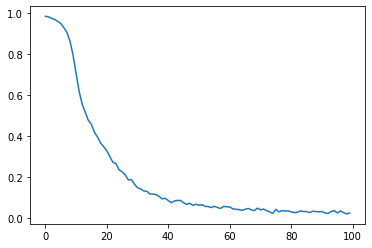

In [47]:
plt.plot(loss_values)

In [43]:
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/loss_values_" + str(num_layers) + "qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/thetass_" + str(num_layers) + "qng.csv", thetass, delimiter=",")

In [44]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/traces_" + str(num_layers) + "qng.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/fidelities_" + str(num_layers) + "qng.csv", fidelities, delimiter=",")

### Compare number of layers

In [14]:
# Init parameters
num_qubits = 7
num_layers = 3
thetas = np.ones(num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 300):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchecker_star2graph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_Wchecker_star2graph(qc.copy(), thetas, num_layers)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280


In [15]:
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/loss_values_qng" + str(num_layers) + ".csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/thetass_qng" + str(num_layers) + ".csv", thetass, delimiter=",")

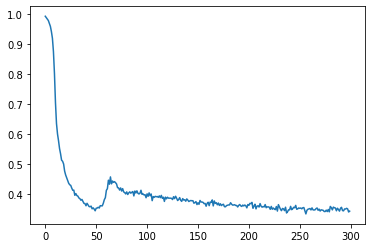

In [16]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [17]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/traces_qng" + str(num_layers) + ".csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/fidelities_qng" + str(num_layers) + ".csv", fidelities, delimiter=",")

### Generate loss values

In [15]:
import os, qiskit, qtm.constant, qtm.nqubit, pandas as pd, numpy as np
path = "../experiments/star_ansatz_ghz/"
dirs = os.listdir(path)
dirs = list(map(int, dirs))
dirs.sort()
num_layers = 2
for dir in dirs:
    dir = str(dir)
    num_qubits = int(dir)
    print(num_qubits)
    thetass_qng = pd.read_csv(path + dir + "/thetass_qng.csv", sep=",", header=None).to_numpy()
    loss_values = []
    for thetas in thetass_qng:
        qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
        qc_copy = qtm.nqubit.create_GHZchecker_star2graph(qc.copy(), thetas, num_layers, np.pi / 2)
        loss = qtm.base.loss_fubini_study(
            qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
        loss_values.append(loss)
        np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")

2
3
4
5
6
7
8
9
10
